# EDOs de 2ª ordem e diferenças finitas

- Prof. Felipe C. Minuzzi
- felipe.minuzzi@ufrgs.br

A aproximação numérica para a derivada de 1ª ordem de uma função $y=f(x)$ em um ponto $x_i$ pode ser obtida por diferença finita, em que a inclinação da função é estimada usando valores da função na vizinhança do ponto. 

Chamamos aproximação _**para frente**_ quando se estima $f'(x_i)$ usando a inclinação da reta secante que passa pelos pontos $(x_i, f(x_i))$ e $(x_{i+1}, f(x_{i+1}))$. A aproximação _**para trás**_ é quando usamos a inclinação da reta que passa pelos pontos $(x_{i-1}, f(x_{i-1}))$ e $(x_{i}, f(x_{i}))$. E a aproximação _**central**_ é quando usamos a inclinação da reta que passa pelos pontos $(x_{i-1}, f(x_{i-1}))$ e $(x_{i+1}, f(x_{i+1}))$.

A seguir são mostradas as fórmulas e uma representação geométrica  que ilustra a aproximação de $f'(x_i)$ _para frente_, _para trás_ e _central_ respectivamente: 


$$f'(x_i) \simeq \frac{f(x_{i+1}) - f(x_i)}{x_{i+1}-x_i} \quad\quad\quad\quad\quad
f'(x_i) \simeq \frac{f(x_{i}) - f(x_{i-1})}{x_i-x_{i-1}} \quad\quad\quad\quad\quad
f'(x_i) \simeq \frac{f(x_{i+1}) - f(x_{i-1})}{x_{i+1}-x_{i-1}}$$

As fórmulas de diferenças finitas mostradas acima podem ser obtidas a partir da série de Taylor para a função $f(x)$ desenvolvida em torno de $x=x_i$ o que nos fornece

$$f(x) = f(x_i) + f'(x_i)(x - x_i) + f''(x_i)\frac{(x - x_i)^2}{2!} + f'''(x_i)\frac{(x - x_i)^3}{3!} + \cdots$$

Ao aproximarmos $x_{i+1}$ por $x_i$, se considerarmos $h=x_{i+1}-x_i$ suficientemente pequeno, podemos desprezar os termos de ordem mais alta, proporcionais a $(x_{i+1}-x_i)^2$, $(x_{i+1}-x_i)^3$,$ \dots$. 

Assim, a derivada de $f(x)$ em $x_i$ pode ser aproximada por

$$f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h} $$

Que é exatamente a fórmula para a aproximação _para frente_ da derivada 1ª de $f$. Observe que nessa aproximação foram desprezados os termos 

$$ O(h^2) = \frac{f''(x_i)h^2}{2} + \frac{f'''(x_i)h^3}{6} + \frac{f''''(x_i)h^4}{24} + \frac{f'''''(x_i)h^5}{120} +\cdots$$

o que mostra que o erro de truncamento depende de $h$. Quanto menor o _passo_ $h$ menor será o erro, no entanto maior será o esforço computacional, o que impossibilita o cálculo com valores de $h$ próximos de zero. 

###  Derivada de 2ª ordem em uma variável

Da mesma forma que a derivada primeira pode ser aproximada em termos da variação da função em dois pontos, a derivada segunda pode ser aproximada em termos da variação na derivada primeira em dois pontos. Por exemplo, considerando as expanções em série de Taylor de $f$ em torno de $x_i$ e calculando a função em $x_{i-1}$ e $x_{i+1}$ obtemos:

$$f(x_{i-1}) = f(x_i) - hf'(x_i) + \frac{h^2f''(x_i)}{2} - \frac{h^3f'''(x_i)}{6} + \dots$$

e

$$f(x_{i+1}) = f(x_i) + hf'(x_i) + \frac{h^2f''(x_i)}{2} + \frac{h^3f'''(x_i)}{6} + \dots$$

Somando as duas equações acima obtemos:

$$f(x_{i-1}) + f(x_{i+1}) = 2f(x_i) + h^2f''(x_i) + \frac{h^4f''''(x_i)}{24} + \dots$$

que, desprezando os termos com derivadas de 4ª ordem ou maiores, nos dá a seguinte aproximação para a derivada
segunda:


$$ f''(x_i) \approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2}$$

### Método de diferenças finitas para EDOs de 2ª ordem

Consiste na reformulação do problema contínuo em um problema discreto usando fórmulas de diferenças finitas tomadas sobre uma malha discretizada do domínio do problema.

Vamos apresentar esse método por meio de um exemplo:

**Exemplo 1:** Seja o problema de valor de contorno 

$-y'' = 100(x-1)^2$, $0<x<1$, 

$y(0)=0$ e $y(1)=0$.

Vamos usar a fórmula de diferenças finitas central de ordem 2 para discretizar a derivada em uma malha uniforme de 11 pontos. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
xi = np.linspace(0, 1, 11)
print(xi)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


A fórmula de diferenças finitas de ordem 2 nos diz que

$$ y''(x_i) \approx \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}$$

substituindo na equação $-y'' = 100(x-1)^2$, obtemos:

$$-\frac{y_{i-1} - 2y_i + y_{i+1}}{h^2} = 100(x_i-1)^2$$

como $h = 0,1$ podemos escrever 

$$y_{i-1} - 2y_i + y_{i+1} = (x_i-1)^2$$

fazendo $i=1,...,9$ na equação acima, juntamente com as condições de contorno $y_0=0$ e $y_{10}= 0$, obtemos o seguinte sistema linear 11x11.

$$ \begin{cases} 
y_{0} = 0\\
y_{0} -2 y_{1} + y_{2}  = (-0,9)^2\\ 
y_{1} -2 y_{2} + y_{3}  = (-0,8)^2\\ 
y_{2} -2 y_{3} + y_{4}  = (-0,7)^2\\ 
\vdots\\
y_{8} -2 y_{9} + y_{10}  = (-0,1)^2\\ 
y_{10} = 0\\ 
\end{cases} $$


cujas matrizes podem ser obtidas como é mostrado a seguir

In [28]:
A = np.identity(11)
for i in range(1,10):
    A[i,i-1:i+2] = np.array([1,-2,1])
print(A)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [29]:
b = -(xi-1)**2
b[0]=0
b

array([ 0.  , -0.81, -0.64, -0.49, -0.36, -0.25, -0.16, -0.09, -0.04,
       -0.01, -0.  ])

A solução pode ser obtida fazendo

In [30]:
yi= np.linalg.solve(A,b)
yi

array([ 0.   ,  2.025,  3.24 ,  3.815,  3.9  ,  3.625,  3.1  ,  2.415,
        1.64 ,  0.825, -0.   ])

**Exemplo 2:** Use o método de diferenças finitas para resolver o seguinte problema de valor de contorno:

$$ \begin{cases} 
-y'' + y= e^{-x} \,\text{, } \,\,\,0,5<x<1,5\\
y(0,5)= 1\\ 
y(1,5)= 2
\end{cases} $$

Para tanto, use a fórmula de diferenças finitas central de ordem 2 para discretizar a derivada em uma malha uniforme com passo $h=0,1$. Faça, então, um esboço do gráfico da solução computada.

Substituindo $ y''(x_i)$ por $\frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$, com $h=0,1$, na equação e simplificando obtém-se um sistema linear. 

As equações do sistema serão dadas por 


$$ \begin{cases} 
y_0 = 1\\
-y_0 + 2,01y_1 - y_1= 0,01e^{-0,1}\\ 
-y_1 + 2,01y_2 - y_3= 0,01e^{-0,2}\\ 
-y_2 + 2,01y_3 - y_4= 0,01e^{-0,3}\\ 
\vdots \\
-y_8 + 2,01y_9 + y_{10}= 0,01e^{-0,9}\\
y_{10}= 2
\end{cases} $$

Computacionalmente podemos encontrar a solução seguindo os passos descritos a seguir. Primeiro entramos com os dados do problema.

In [48]:
N = 11
x0 = 0.5
xn = 1.5
h = (xn-x0)/(N-1)
xi = np.linspace(x0, xn, N)  

Então construímos as matrizes $A$ e $b$.


In [49]:
A = np.zeros((N,N))  
b = np.zeros(N)  
 
A[0,0] = 1  
b[0] = 1  

for i in np.arange(1,N-1):
    A[i,i-1] = -1  
    A[i,i] = 2+h**2
    A[i,i+1] = -1  
    b[i] = h**2*np.exp(-xi[i])  
A[N-1,N-1] = 1  
b[N-1] = 2  
print(A)

[[ 1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-1.    2.01 -1.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   -1.    2.01 -1.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.   -1.    2.01 -1.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -1.    2.01 -1.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -1.    2.01 -1.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.   -1.    2.01 -1.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -1.    2.01 -1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.   -1.    2.01 -1.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.   -1.    2.01 -1.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.  ]]


In [50]:
print(b)

[1.         0.00548812 0.00496585 0.00449329 0.0040657  0.00367879
 0.00332871 0.00301194 0.00272532 0.00246597 2.        ]


Resolvendo o sistema

In [51]:
yi = np.linalg.solve(A,b)  
print(yi)

[1.         1.06189437 1.12891956 1.2022681  1.28314602 1.37278972
 1.47248251 1.58357142 1.7074841  1.8457463  2.        ]


Antes de plotar a solução numérica obtida, vamos encontrar a solução analítica usando `sympy`

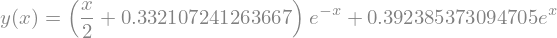

In [ ]:
import sympy as sp

x = sp.symbols('x')
y = sp.Function('y')(x)
eq = -y.diff(x,x)+y-sp.exp(-x)
sol = sp.dsolve(eq, y, ics={y.subs(x, 0.5):1, y.subs(x, 1.5): 2})
sol

Calculando o erro quadrático médio

In [59]:
y_ex =(xi/2 + 0.332107241263667)*np.exp(-xi) + 0.392385373094705*np.exp(xi)

err = np.mean((yi-y_ex)**2)
print('Erro quadrático médio (11 pontos):',err)

Erro quadrático médio (11 pontos): 1.8502912502771752e-09


Plotando a solução numérica e a solução analítica

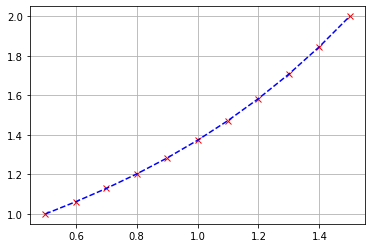

In [60]:
plt.plot(xi,yi,'rx', xi, y_ex,'b--' )
plt.grid()
plt.show()

**Exemplo 3:** Considere o seguinte problema de valor de contorno para a equação de calor no estado estacionário 

$$ \begin{cases} 
-y'' = 200e^{-(x-1)^2} \,\text{, } \,\,\,0<x<2\\
y'(0)=0\\ 
y(2)=100
\end{cases} $$

Aproxime a derivada segunda por um esquema de segunda ordem, a derivada primeira na fronteira por um esquema de primeira ordem e transforme a equação diferencial em um sistema de equações lineares. Resolva o sistema linear obtido.

Escolhendo uma discretização em 21 pontos no intervalo de 0 a 2, temos $h=0,2$. O esquema de fiferenças finitas de 1ª ordem na fronteira esquerda será dado pela equação

$$y'(x_i)\approx\ \frac{f(x_{i+1})-f(x_i)}{h}  \,\,\,\,\,\text{ou} \,\,\,\, y'_0=0\approx\frac{y_1-y_0}{0,1}$$

assim as equações fornecidas pelas condições de contorno são

$$ y_1-y_0 = 0 \,\,\,\,\,\text{e} \,\,\,\, y_{20}=100$$

As demais equações serão fornecidas pelo esquema de segunda ordem, ou seja, serão dadas por

$$ y''(x_i)= 200e^{-(xi-1)^2} \approx \frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$$

que leva a 

$$ y_{i-1}-2y_i+y_{i+1}=2e^{-(xi-1)^2}  \,\,\,\,\,\text{para} \,\,\,\, i=1,...,19$$



Temos, portanto

$$ \begin{cases} 
y_0 - y_1 = 0\\
y_1 - 2y_1 + y_1= 2e^{-(0,2-1)^2}\\
y_2 - 2y_2 + y_3= 2e^{-(0,4-1)^2}\\
\vdots \\
y_{18} - 2y_{18} + y_{19}= 2e^{-(1,6-1)^2}\\
y_{19} - 2y_{18} + y_{19}= 2e^{-(1,8-1)^2}\\
y_{20}= 100
\end{cases} $$


In [ ]:
N = 11
x0 = 0.0
xn = 2.0
h = (xn-x0)/(N-1)
xi = np.linspace(x0, xn, N)  
print('xi=',xi)

A = np.zeros((N,N))  
b = np.zeros(N)  
 
# Condições de contorno
A[0,0] = 1
A[0,1] = -1
A[N-1,N-1] = 1
b[0] = 0
b[N-1] = 100

# montando as matrizes A e b
for i in np.arange(1,N-1):
    A[i,i-1] = 1  
    A[i,i] = -2
    A[i,i+1] = 1  
    b[i] = 2*np.exp(-(xi[i]-1)**2)  
print('A=',A)

#resolvendo o sistema
yi = np.linalg.solve(A,b)  
print('yi=',yi)

#plotando
plt.plot(xi,yi)
plt.grid()
plt.show()

**Exemplo 4:** Dado o problema de contorno de segunda ordem linear

$$
y^{\prime \prime}=p(x) y^{\prime}+q(x) y+r(x), \quad \text { para } a \leq x \leq b \operatorname{com} y(a)=\alpha \text { e } y(b)=\beta,
$$

a resolução pelo método das diferenças finitas requer aproximações numéricas para $y'$ e $y''$ em um conjunto pontos que dividem o intervalo $[a,b]$ em $N+1$ subintervalos cujos extremos são os pontos $x_i=a+ih$, com $i=0,1,2,...,N+1$ da malha, e $h=(b-a)/(N+1))$.

Aproximando $y'$ e $y''$ pela fórmula de diferenças centradas obtemos uma equação na forma

$$
\left(\frac{-y_{i+1}+2 y_i-y_{i-1}}{h^2}\right)+p\left(x_i\right)\left(\frac{y_{i+1}-y_{i-1}}{2 h}\right)+q\left(x_i\right) y_i=-r\left(x_i\right)
$$

para cada $i=1,2,...,N$. 

As equações podem ser reescritas na forma 
$$
-\left(1+\frac{h}{2} p\left(x_i\right)\right) y_{i-1}+\left(2+h^2 q\left(x_i\right)\right) y_i-\left(1-\frac{h}{2} p\left(x_i\right)\right) y_{i+1}=-h^2 r\left(x_i\right),
$$

que vai gerar o sistema linear tridiagonal $N \times N$ cuja solução dará a solução numérica do problema de valor de contorno.  

Use método apresentado para obter uma aproximação para a solução do problema de contorno

$$
y^{\prime \prime}=-\frac{2}{x} y^{\prime}+\frac{2}{x^2} y+\frac{\operatorname{sen}(\ln x)}{x^2}, \quad \text { para } 1 \leq x \leq 2, \operatorname{com} y(1)=1 \text { e } y(2)=2.
$$


In [41]:
a = 1.0
b = 2.0
ya = 1
yb = 2

N = 9
h = (b-a)/(N+1)
A = np.zeros((N,N))
b = np.zeros(N)

p = lambda x: -2./x
q = lambda x: 2./x**2
r = lambda x: np.sin(np.log(x))/x**2

In [42]:
x = a+h
A[0,0] = 2+h**2*q(x)
A[0,1] = -1+(h/2)*p(x)
b[0] = -h**2*r(x)+(1+(h/2)*p(x))*ya
#print(x)

for i in range(1,N-1):
    x = a+(i+1)*h
    A[i,i-1] = -1-(h/2)*p(x)
    A[i,i] = 2+h**2*q(x) 
    A[i,i+1] = -1+(h/2)*p(x)
    b[i] = -h**2*r(x)
    #print(x)
    
x = a+(N)*h
#print (x)
A[N-1,N-2] = -1-(h/2)*p(x)
A[N-1,N-1] = 2+h**2*q(x)
b[N-1] = -h**2*r(x)+(1-(h/2)*p(x))*yb

In [43]:
print (np.round(A,3))
print (np.round(b,3))

[[ 2.017 -1.091  0.     0.     0.     0.     0.     0.     0.   ]
 [-0.917  2.014 -1.083  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.923  2.012 -1.077  0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.929  2.01  -1.071  0.     0.     0.     0.   ]
 [ 0.     0.     0.    -0.933  2.009 -1.067  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.938  2.008 -1.062  0.     0.   ]
 [ 0.     0.     0.     0.     0.    -0.941  2.007 -1.059  0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.944  2.006 -1.056]
 [ 0.     0.     0.     0.     0.     0.     0.    -0.947  2.006]]
[ 9.080e-01 -1.000e-03 -2.000e-03 -2.000e-03 -2.000e-03 -2.000e-03
 -2.000e-03 -2.000e-03  2.104e+00]


In [44]:
np.linalg.solve(A,b)

array([1.09260052, 1.18704313, 1.28333687, 1.38140205, 1.48112026,
       1.5823599 , 1.68498902, 1.78888175, 1.8939211 ])

### Exercícios:

(Adaptados de https://www.ufrgs.br/reamat/CalculoNumerico)**:**

**1.** Considere o seguinte problema de valor de contorno para a equação de calor no estado estacionário 

$$ \begin{cases} 
-y'' = 200e^{-(x-1)^2} \,\text{, } \,\,\,0<x<2\\
y(0)=120\\ 
y(2)=100
\end{cases} $$

Aproxime a derivada segunda por um esquema de segunda ordem, a derivada primeira na fronteira por um esquema de primeira ordem e transforme a equação diferencial em um sistema de equações lineares. Resolva o sistema linear obtido. Use uma discretização com 21 pontos.

**2.** Considere o seguinte problema de valor de contorno para a equação de calor no estado estacionário com um termo não linear de radiação

$$-y'' = 100 - \frac{y^4}{10000} \,\text{, } \,\,\,0<x<2$$
$$y(0)=0 \,\,\,\text{e}\,\,\, y(2)=10$$

Aproxime a derivada segunda por um esquema de segunda ordem, a derivada primeira na fronteira por um esquema de primeira ordem e transforme a equação diferencial em um sistema de equações lineares. Resolva o sistema linear obtido.

**3.** Considere o seguinte problema de valor de contorno para a equação de calor no estado estacionário com um termo não linear de radiação e um termo de convecção

$$-y'' +3y'= 100 - \frac{y^4}{10000} \,\text{, } \,\,\,0<x<2$$
$$y'(0)=0 \,\,\,\text{e}\,\,\, y(2)=10$$

Aproxime a derivada segunda por um esquema de segunda ordem, a derivada primeira na fronteira por um esquema de primeira ordem e transforme a equação diferencial em um sistema de equações lineares. Resolva o sistema linear obtido.

**4.** O problema de contorno ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/789))

$$
y^{\prime \prime}=y^{\prime}+2 y+\cos x, \quad 0 \leq x \leq \frac{\pi}{2}, \quad y(0)=-0,3, \quad y\left(\frac{\pi}{2}\right)=-0,1,
$$

tem a solução $y(x)=-\frac{1}{10}(\operatorname{sen} x+3 \cos x)$. Use o método das diferenças finitas linear para obter uma aproximação para a solução e compare os resultados com a solução real. Repita para diferentes valores de $h$.

**5.** O problema de contorno ([fonte](https://integrada.minhabiblioteca.com.br/reader/books/9788522123414/pageid/789))

$$
y^{\prime \prime}=4(y-x), \quad 0 \leq x \leq 1, \quad y(0)=0, \quad y(1)=2
$$

tem a solução $y(x)=e^2\left(e^4-1\right)^{-1}\left(e^{2 x}-e^{-2 x}\right)+x$. Use o método das diferenças finitas linear para obter uma aproximação para a solução e compare os resultados com a solução real. Repita para diferentes valores de $h$.